In [2]:
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn import datasets
import seaborn as sns
from tqdm import tqdm

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

from sklearn import model_selection

In [3]:
df = pd.read_csv('/Users/antosale/Desktop/Geek Brains/ML_algorythms.git/train.csv')
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [5]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


Пропусков нет, какой-то слишком красивый датасет

In [6]:
df['choose'].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

<AxesSubplot:>

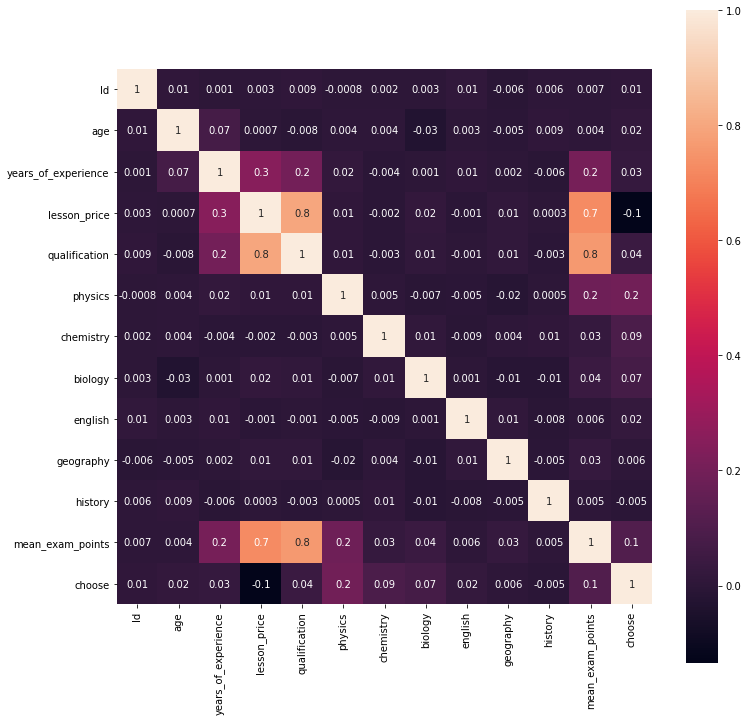

In [7]:
plt.rcParams["figure.figsize"] = [12,12]
sns.heatmap(df.corr(), annot=True, fmt='.1g', square=True)

Матрица корреляций показывает, что есть некоторая связь между признаками, но не с целевой переменной

In [8]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [9]:
y = np.array(df['choose'])
X_ = df.drop(columns=['Id','choose'])

Отмасштабируем наш датасет

In [87]:
def fitter(X: np.array) -> np.array:
    X_mean, X_std = X.T.mean(axis=1), X.T.std(axis=1)
    X = (X_ - X_mean) / X_std
    X = np.c_[np.ones(X.shape[0]), X]
    return X

X = fitter(X_)

In [88]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

Сперва попробую обучить модель на примере градиентного спуска

In [90]:
def calc_log_loss(y_true, y_pred):
    tol = 1e-5
    y_pred = y_pred.copy()
    y_pred = np.clip(y_pred, a_min=tol, a_max=1-tol)
    score = np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
    return -score

def sigmoid(z):
    result = 1 / (1 + np.exp(-z))
    return result

def eval_model(X, y, iterations, eta=1e-4, tol=1e-5):
    
    np.random.seed(21)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors, weights = [],[]
    
    for n_iter in range(1, iterations+1):
        z = np.dot(W,X.T)
        y_pred = sigmoid(z)
        current_error = calc_log_loss(y, y_pred)
        W = W - eta * (1/n * np.dot((y_pred - y), X))
        errors.append(current_error)
        weights.append(W)

        if n_iter > 2 and np.abs(current_error - errors[-2]) < tol:
            break
            
    errors = np.array(errors)
    return weights[-1]

def calc_pred_proba(W, X):
    y_pred = 1 / (1 + np.exp(-np.dot(W, X)))
    return y_pred

def calc_pred(W, X, threshold=0.5):
    y_pred = calc_pred_proba(W,X)
    y_pred = np.where(y_pred > threshold, 1, 0)
    return y_pred
    

In [105]:
W_train = eval_model(X_train, y_train, iterations=10000, eta=1e-4, tol=1e-5)
y_proba_tr = calc_pred_proba(X_train, W_train)
train_score = roc_auc_score(y_train, y_proba_tr)

W_test = eval_model(X_test, y_test, iterations=10000, eta=1e-4, tol=1e-5)
y_proba_test = calc_pred_proba(X_test, W_test)
test_score = roc_auc_score(y_test, y_proba_test)

print(f'ROC AUC score for train: {train_score:.2f}')
print(f'ROC AUC score for test: {test_score:.2f}')


ROC AUC score for train: 0.51
ROC AUC score for test: 0.52


Скор получился очень низким, попробую градиентный бустинг

In [106]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [107]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [108]:
def bias(y, z):
    return (y - z)

In [109]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in tqdm(range(n_trees)):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [119]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    train_score = roc_auc_score(y_train, train_prediction)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction), 3)} \
    roc auc train = {train_score:.3f}') 

    test_prediction = gb_predict(X_test, trees, coefs, eta)
    test_score = roc_auc_score(y_test, test_prediction)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction), 3)} \
    roc auc test = {test_score:.3f}')

In [192]:
# Число деревьев в ансамбле
n_trees = 30

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 6

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

100%|██████████| 30/30 [05:42<00:00, 11.42s/it]


In [193]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 6     с шагом 0.1 на тренировочной выборке: 0.066     roc auc train = 0.905
Ошибка алгоритма из 30 деревьев глубиной 6     с шагом 0.1 на тестовой выборке: 0.076     roc auc test = 0.834


На трейне и тесте модель показывает неплохой результат, особенно, по сравнению с лог регрессией.
Но когда я заливаю его на submission, валидация полностью разносит даже самый базовый алгоритм с roc auc ~ 0.496

Пока что не понимаю, где что делаю не так.

In [146]:
df_test = pd.read_csv('/Users/antosale/Desktop/Geek Brains/ML_algorythms.git/test.csv')
x_ = df_test.drop(columns=['Id'])
x_test = fitter(x_)

In [194]:
y_pred = gb_predict(x_test, trees, coefs, eta)

In [203]:
df_test['choose'] = y_pred
sub = df_test[['Id', 'choose']]
sub['choose'] = np.where(sub['choose'] > 0.5, 1, 0)

/Users/antosale/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
sub.to_csv('Antoshin_predictions_DTR.csv', index=False)